In [1]:
import xlrd
print(xlrd.__version__)  # Cela devrait afficher une version >= 2.0.1

2.0.1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_excel("titanic.xls")

In [5]:
data.shape
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [7]:
data.head ()  # die erste Zeilen der Daten

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
data = data.drop(['name', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis = 1)
# die Spalten werden entfernt mit drop auf der Spalten axe 1


In [11]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [13]:
data.describe()   # für Statistiken 
# Für die Beschreibung bemerken wir, dass 38% von Personen überleben haben,
# 29 ist das ducrhnittliche Alter
# 80 Jahre Alt sind die älteste Personen 
# Von den 1309 Personen, die wir haben, sind 1046 Alter bekannt, das heißt, es gibt Personen, die kein Alter eingegeben haben.

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [15]:
# remplace l'age par l'age moyen corrompre les donnees  
# data.fillna(data["age"].mean()) 
# alors il est preferable de supprimer les lignes qui n'ont pas de donnees 
data = data.dropna(axis=0)   # ou on peut utiliser inplace : data.dropna(axis=0, inplace=True) ca modifie le dataset et enregistre la modification
data.shape

(1046, 4)

In [17]:
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [169]:
# Pour les passagers qui etaient en 1ere classe, 2eme classe et 3e classe
data["pclass"].value_counts()

pclass
3    501
1    284
2    261
Name: count, dtype: int64

<Axes: xlabel='pclass'>

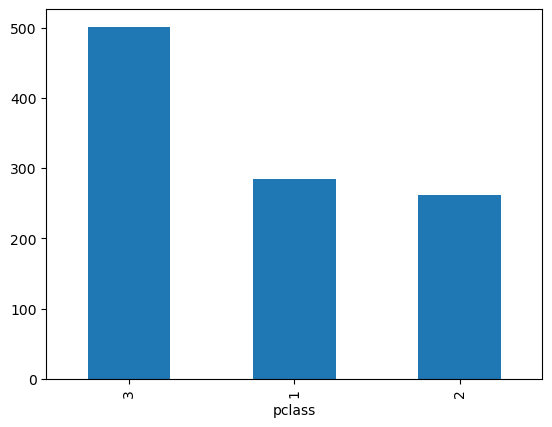

In [171]:
data["pclass"].value_counts().plot.bar()

<Axes: >

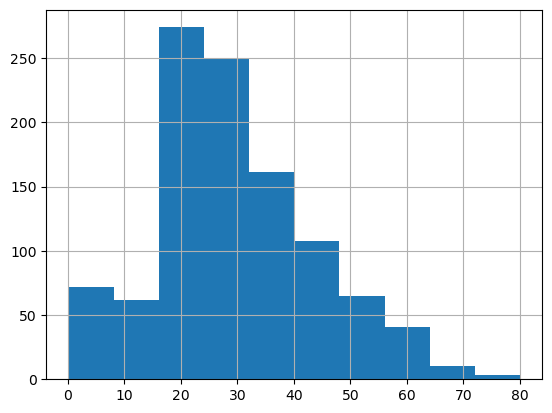

In [173]:
data["age"].hist()

In [21]:
data.groupby(["sex", "pclass"]).mean()    # regroupant les donnees en fonction du parametre voulue 

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [31]:
data.groupby(["sex", "pclass"]).describe() 

survived                                                 age  \
                 count      mean       std  min  25%  50%  75%  max  count   
sex    pclass                                                                
female 1         133.0  0.962406  0.190931  0.0  1.0  1.0  1.0  1.0  133.0   
       2         103.0  0.893204  0.310364  0.0  1.0  1.0  1.0  1.0  103.0   
       3         152.0  0.473684  0.500958  0.0  0.0  0.0  1.0  1.0  152.0   
male   1         151.0  0.350993  0.478869  0.0  0.0  0.0  1.0  1.0  151.0   
       2         158.0  0.145570  0.353796  0.0  0.0  0.0  0.0  1.0  158.0   
       3         349.0  0.169054  0.375338  0.0  0.0  0.0  0.0  1.0  349.0   

                                                                      
                    mean        std     min   25%   50%    75%   max  
sex    pclass                                                         
female 1       37.037594  14.272460  2.0000  24.0  36.0  48.00  76.0  
       2       27.499191  12.911813  0.9167  20.0  28.0  34.00  60.0  
       3       22.185307  12.205294  0.1667  16.0  22.0  30.00  63.0  
male   1       41.029250  14.578590  0.9167  30.0  42.0  50.00  80.0  
       2       30.815401  13.977355  0.6667  23.0  29.5  38.75  70.0  
       3       25.962273  11.682395  0.3333  20.0  25.0  32.00  74.0

In [35]:
data1 = pd.read_excel("titanic.xls")
data1 = data1.set_index("name")
data1["age"]

name
Allen, Miss. Elisabeth Walton                      29.0000
Allison, Master. Hudson Trevor                      0.9167
Allison, Miss. Helen Loraine                        2.0000
Allison, Mr. Hudson Joshua Creighton               30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    25.0000
                                                    ...   
Zabour, Miss. Hileni                               14.5000
Zabour, Miss. Thamine                                  NaN
Zakarian, Mr. Mapriededer                          26.5000
Zakarian, Mr. Ortin                                27.0000
Zimmerman, Mr. Leo                                 29.0000
Name: age, Length: 1309, dtype: float64

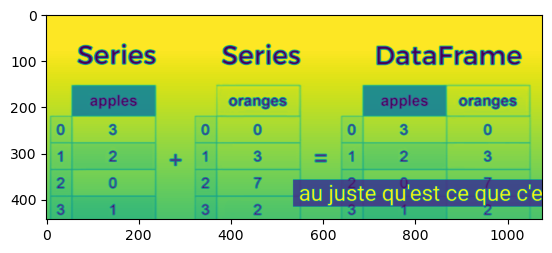

In [29]:
# Dataframe succession de plus de 2 series, et Serie cest juste une colone 
image = plt.imread("series.png")
image = image[:,:,0]
plt.imshow (image)

In [181]:
data["age"][0:10]  #indexing ca donne les 10 premieres valeurs du tableau

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
5    48.0000
6    63.0000
7    39.0000
8    53.0000
9    71.0000
Name: age, dtype: float64

In [192]:
data[data["age"]<18]["pclass"].value_counts()  # boolean indexing

pclass
3    106
2     33
1     15
Name: count, dtype: int64

In [196]:
data[data["age"]<18].groupby(["sex", "pclass"]).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

In [200]:
data.iloc[0,0]

1

In [204]:
data.iloc[0:2, 0:2]    # avec ceci on travaille sur des lignes mais avec loc in travaille sur des colones 

,pclass,survived
0,1,1
1,1,1


In [208]:
data.loc[0:2, ["age", "sex"]] 

,age,sex
0,29.0000,female
1,0.9167,male
2,2.0000,female


In [232]:
Cat0 = data[data["age"]< 20]
Cat0.drop(["survived", "pclass", "sex"], axis=1)

,age
1,0.9167
2,2.0000
11,18.0000
27,19.0000
53,17.0000
...,...
1275,16.0000
1279,14.0000
1288,18.0000
1300,15.0000


In [234]:
Cat0["pclass"].value_counts()

pclass
3    148
2     51
1     26
Name: count, dtype: int64

In [236]:
data1= data[data["age"]>20]
Cat1 = data1[data1["age"]<40]
Cat1.drop(["survived", "pclass", "sex"], axis=1)

,age
0,29.0
3,30.0
4,25.0
7,39.0
12,24.0
...,...
1298,36.0
1299,27.0
1306,26.5
1307,27.0


In [240]:
Cat1["pclass"].value_counts()

pclass
3    279
2    150
1    124
Name: count, dtype: int64